# ARBITRARY VALUE IMPUTATION FOR CATEGORICAL VARIABLES

This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.

This is in essence, the equivalent of replacing by an arbitrary value for numerical variables. It does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data is high.

<br>

__Dtype__:<br>
- Categorical variables.

__Assumptions__:<br>
- Data is not missing at random.

__Limitations__:
- If the number of NA is small, creating an additional category may cause trees to over-fit

__Datasets__:
- House Prices dataset

<br>

### Content:

1. Loading Data and Basic Data Exploration
2. Train/Test Splitting.
3. Adding "Missing" Column. Detection of Changes before and after Imputation.
    - when missing data is <5%
    - when the percentage of missing data is high

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

## 1. Loading Data and Basic Data Exploration

In [2]:
# use only the following variables

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [3]:
#inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

## 2. Train/Test splitting


In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

## 3. Adding "Missing" Column. Detection of Changes before and after Imputaion.

### - for BsmtQual (when missing data is __<5%__)

Text(0, 0.5, 'Number of houses')

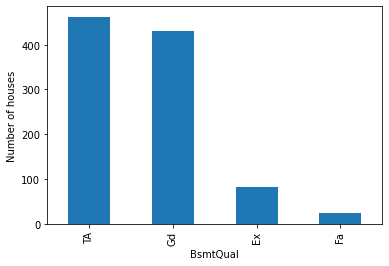

In [5]:
# inspect the number of observations per category

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [6]:
# the most frequent category is TA

# fill na in both train and test
# with adding the column for missing values

X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

C:\Users\48796\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Text(0, 0.5, 'Number of houses')

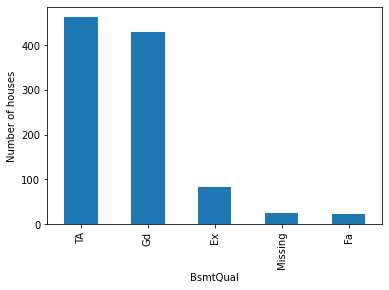

In [7]:
# plot the number of houses per category in the imputed variable

X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [8]:
# a function for plotting the distribution of the target for the houses
# that show the different categories of the variable

def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()

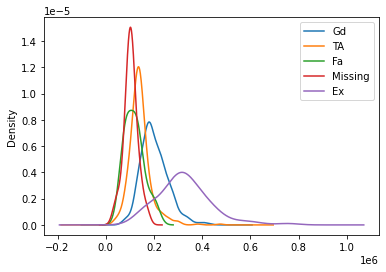

In [9]:
# for BsmtQual:

# plot the distribution of the target for the houses
# that show the different categories of the variable

automate_plot(X_train, 'BsmtQual', 'SalePrice')

The houses with different labels show different distributions of Prices. The houses with the label Extend to be the most expensive, whereas the houses that show Missing or Fa is the cheapest.

### - for FirePlaceQu (when the percentage of missing data is high)

In [10]:
# the % of missing values
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

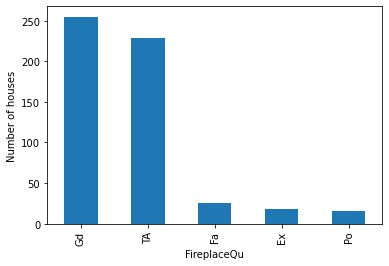

In [11]:
# inspect the number of observations per category

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [12]:
# fill na in both train and test

X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

C:\Users\48796\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Text(0, 0.5, 'Number of houses')

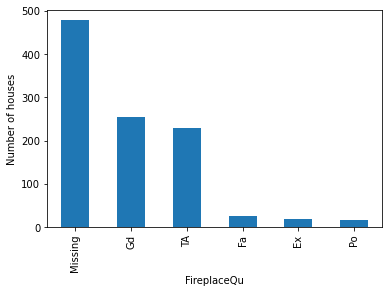

In [13]:
# inspect the number of observations per category
# in the imputed variable

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

"Missing" contains most of the houses, as most showed missing data originally.

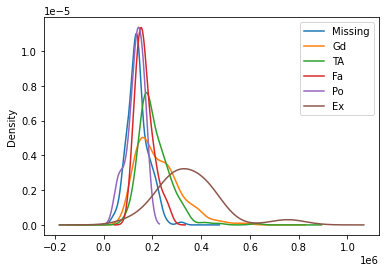

In [14]:
# for FireplaceQu:

# plot the distribution of the target for the houses
# that show the different categories of the variable

automate_plot(X_train, 'FireplaceQu', 'SalePrice')

Again, the houses with different labels for FirePlaceQu show different distributions of SalePrice, with those showing Ex being the most expensive ones and those showing Missing, or Fa being the cheapest ones.